In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

In [12]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4596,567,France,Male,38,6,127678.80,2,0,0,45422.89,0
5677,655,Germany,Male,32,9,113447.01,1,1,0,82084.30,0
9026,546,Spain,Female,36,7,85660.96,1,0,0,134778.01,0
7995,708,France,Female,67,1,0.00,2,0,1,3837.08,0
9756,648,Spain,Female,43,7,81153.82,1,1,1,144532.85,1


In [15]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [21]:
X=df.drop(columns=['Exited'])
Y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [22]:
X_train.shape


(8000, 11)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim = 11))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy' ,optimizer='Adam',metrics=['accuracy'])

In [49]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7325 - loss: 0.6179 - val_accuracy: 0.7975 - val_loss: 0.4919
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.4850 - val_accuracy: 0.8012 - val_loss: 0.4500
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8121 - loss: 0.4356 - val_accuracy: 0.8025 - val_loss: 0.4363
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8057 - loss: 0.4381 - val_accuracy: 0.8056 - val_loss: 0.4284
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8203 - loss: 0.4223 - val_accuracy: 0.8125 - val_loss: 0.4221
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8276 - loss: 0.4127 - val_accuracy: 0.8150 - val_loss: 0.4149
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8337 - loss: 0.3969 - val_accuracy: 0.8206 - val_loss: 0.4068
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8406 - loss: 0.3968 - val_accu

In [41]:
model.layers[1].get_weights()

[array([[-0.79852   ,  0.5745419 ,  0.02087824, -0.5515328 ],
        [ 1.2303954 ,  0.7691519 , -0.5826954 ,  1.1699904 ],
        [-0.7948966 , -0.3452683 , -0.41324452, -0.00919325],
        [-0.6575445 ,  0.5303472 , -1.0116016 , -0.04590183],
        [-0.8493377 ,  0.07992766, -0.60005015,  0.13875853],
        [ 0.67920405, -0.18707964,  0.90440327,  0.9232395 ],
        [-0.15293626, -0.4179153 , -0.42661813,  0.7681939 ],
        [ 0.13235843, -1.4889138 ,  1.0082444 ,  0.2689621 ]],
       dtype=float32),
 array([-0.2849346 ,  0.5289404 ,  0.28750107,  0.8874115 ], dtype=float32)]

In [42]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [43]:
y_pred= np.where(y_log>0.4,1,0)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.859

In [50]:
import matplotlib.pyplot as plt


In [51]:
history.history

{'accuracy': [0.774218738079071,
  0.7979687452316284,
  0.8020312786102295,
  0.8092187643051147,
  0.8165624737739563,
  0.8231250047683716,
  0.827343761920929,
  0.8373437523841858,
  0.8423437476158142,
  0.8442187309265137,
  0.8485937714576721,
  0.8510937690734863,
  0.8545312285423279,
  0.8576562404632568,
  0.8576562404632568,
  0.8578125238418579,
  0.8579687476158142,
  0.8596875071525574,
  0.860156238079071,
  0.8603125214576721,
  0.8609374761581421,
  0.8618749976158142,
  0.8628125190734863,
  0.8609374761581421,
  0.8604687452316284,
  0.860156238079071,
  0.8618749976158142,
  0.8628125190734863,
  0.8618749976158142,
  0.8618749976158142,
  0.86328125,
  0.864062488079071,
  0.8635937571525574,
  0.8629687428474426,
  0.864062488079071,
  0.8626562356948853,
  0.8634374737739563,
  0.8629687428474426,
  0.8637499809265137,
  0.8623437285423279,
  0.8637499809265137,
  0.8660937547683716,
  0.8650000095367432,
  0.8635937571525574,
  0.8646875023841858,
  0.86406248

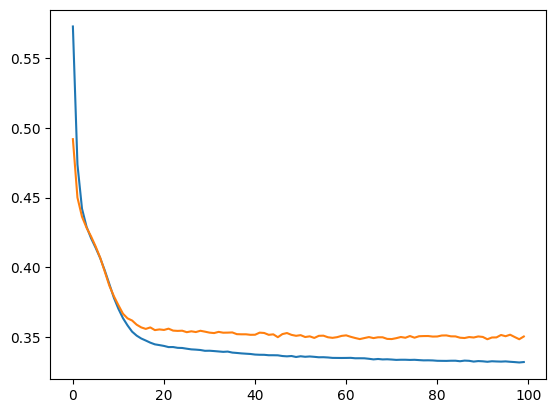

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

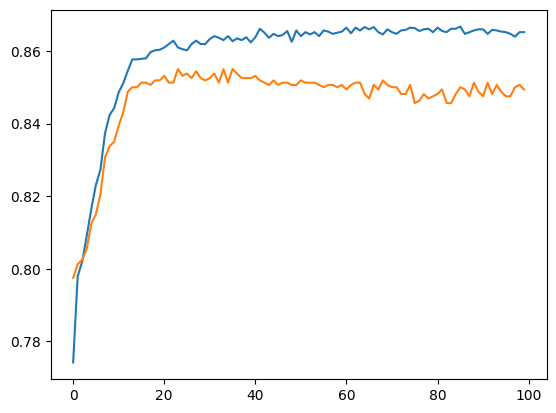

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])